# Setting up data processing and capturing

## Plot data functions
How we plot the data

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [53]:
def plot(x,y):

    plt.ylabel('operations n')
    plt.xlabel('time O(n)')
    plt.xscale("log")
    plt.yscale("log")
    
    plt.rcParams['axes.facecolor']='lightgrey'
    plt.rcParams['savefig.facecolor']='white'
    
    # Show the major grid lines with dark grey lines
    plt.grid(b=True, which='major', color='#FFFFFF', linestyle='-')

    # Show the minor grid lines with very faint and almost transparent grey lines
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#FFFFFF', linestyle='-', alpha=0.3)
    
    plt.plot(x,y,'ro')
    
    
    plt.show()

In [44]:
def compare(results):
    middle = [result[0] for result in results]
    biggest = [result[1] for result in results]

    ind = np.arange(len(results)) 
    width = 0.35       
    plt.bar(ind, middle, width, label='medium (31)')
    plt.bar(ind + width, biggest, width, label='max (1258)')

    plt.ylabel('time (µs)')
    plt.title('Times by algorithm type')

    plt.xticks(ind + width / 2, ('simple', 'advanced', 'native'))
    plt.legend(loc='best')
    plt.yscale("log")
    plt.show()

## Time calculation code
We repeat the functions many times and take the avrage as even with the highest precision  
method possible the faster algorithms take less time than we can meassure

We take logarithmic steps up in complexity to get a linear spread of points when we go to view the results in a logarithmic scale afterwards

In [11]:
def do_n_times(func,x,n,times):
    for i in range(times):
        func(x,n)

In [30]:
import time
def take_time_of(function,x,n):
    repeats = 10**5
    start = time.time()
    
    do_n_times(function,x,n,repeats)
    end = time.time()
    
    avrage = (end-start) / repeats 
    return avrage

In [13]:
import math
def complexity_of(function,x,maxRecursion):
    
    def O(n):
        return take_time_of(function,x,n) 
    
    step_length = 0.1
    tests = round(math.log10(maxRecursion) / step_length)
    
    operations = [round(10**(n * step_length)) for n in range(tests)]
    times = [O(n) for n in operations]
    
    plot(times,operations)
    middle = times[round(len(times)/2)]* 10**(6)
    biggest = times[-1]* 10**(6) 
    return [middle, biggest]


--------------------

# 

# Defining Equations 

## Simple exponent equation 
From page **28** task **2.1 - 1**

$ x^n   \left\{
\begin{array}{ll}
      1 & n=0 \\
      x * x^{n-1} & n>0 \\
\end{array} 
\right.  $

In [58]:
def simple_xpn(x,n):
    if n == 0: return 1
    return x * simple_xpn(x,n-1)

## Advanced Exponent Equation 
From page **38** task **2.1 - 1**

$ x^n   \left\{
\begin{array}{ll}
      1 & n=0 \\
      ({x^2})^{({n-1})/2} * x & when\: n\: is\: odd \\
      ({x^2})^{n/2} & when\: n\: is\: even \\
\end{array} 
\right.  $

In [59]:
def advanced_xpn(x,n):
    if n == 0: return 1
    if n%2 == 1: return x * advanced_xpn(x*x,(n-1)/2)
    return advanced_xpn(x*x, n/2)

## Native Exponential Equation 
Tough i could not find any sources on how exactly Python implements its exponential function, we can take an educated guess it uses some variant of the [Addition-chain exponentiation](https://en.wikipedia.org/wiki/Addition-chain_exponentiation) that can be optimized to run at a low time complexity:
>In general, the number of multiplication operations required to compute bn can be reduced to Θ(log n)
>
> -- <cite>[Gordon, D. M.](https://www.dmgordon.org/papers/jalg.pdf)</cite>

We can see in our results that indeed the algorithm is a lot faster, especially at lower n computations

In [60]:
def native_xpn(x,n):
    return x**n

## Test of Equations

In [61]:
def testExponential(name,func):
    result = "Passed ✅" if func(2,10)==1024 and func(3,14)==4782969 else "Failed ❌"
    print(f"{result} : {name} Equation")
    
testExponential("Simple",simple_xpn)
testExponential("Advanced",advanced_xpn)
testExponential("Native",native_xpn)

Passed ✅ : Simple Equation
Passed ✅ : Advanced Equation
Passed ✅ : Native Equation


--------------------

# 
# Different execution times
In the table bellow we can see how different the execution times are (note that the time scale is logarithmic!)  
Bellow we go trough calculating the time complexities.

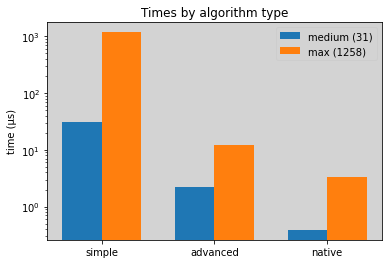

In [47]:
compare([simple, advanced, native])



### Simple equation
With the simple equation we can find the time complexity using asymptotic analysis.  
We find a time complexity of: 
 
 
$
T(n) = T(n-1) + 1 = n\\
\Rightarrow O(n)
$

The linear result from the asymptotic analysis seems to fit the data well.

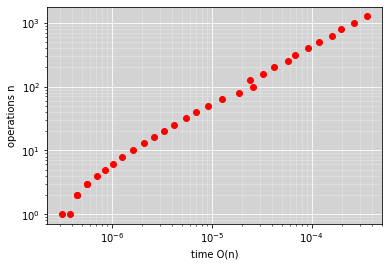

In [55]:
simple = complexity_of(simple_xpn,2,1500)

### Advanced equation
For the advanced equation we can use a general method.  
Time complexity of recursive functions can all be described with the equation:  


$
T(n)  \left\{
\begin{array}{ll}
      1 & whe n=0 \\
      aT\:({n\:/\:b}) + cn^k & whe n>0 \\
\end{array} 
\right.\\
$



$
b^k < a \:\: \Rightarrow \:\: T(n) \in O(n^{logb\: a})\\
b^k = a \:\: \Rightarrow \:\: T(n) \in O(n^k * {log\: n})\\
b^k > a \:\: \Rightarrow \:\: T(n) \in O(n^k)\\
$

So for our advanced function putting in for the variables we get: 

$
b=2\\
a=1\\
k=0\\
$

$
b^k=a\:\: \Rightarrow\: O(n^0 * log(n)) \Rightarrow\: O(log(n))
$

When we look at the plot for our advanced equation we see a slight downward trend at the end, but
This may simply be because our operation count isn't high enough, unfortunately due to recursion limits we can't increase that any further

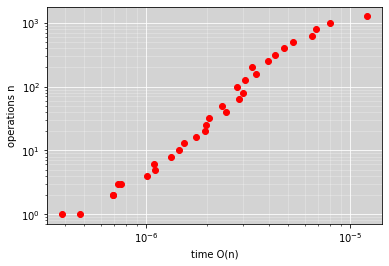

In [56]:
advanced = complexity_of(advanced_xpn,2,1500)

### Native function

Though we don't have the algorithm for the native function using our educated guess about what is running under the hood and that the plotted graph can be fitted very close to $O(log(n))$ we can assume it is somethind to that extent.


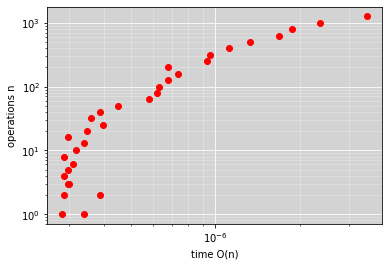

In [57]:
native = complexity_of(native_xpn,2,1500)

## Authors
- Jesper Hustad  

- Magnus Nordahl
- Michal Panasewicz
- Mats Erik Tuhus Olsen
- Henrik Latsch